In [1]:
import pandas as pd
from pathlib import Path

project_root = Path().resolve().parent
data_path = project_root / "data" / "processed" / "features.csv"

df = pd.read_csv(data_path)

In [7]:
# Feature columns = all except labels and metadata
X = df.drop(columns=["activity", "sensor", "user", "timestamp"], errors="ignore")
y = df["activity"]

print(X.shape)
print(y.value_counts())


(2381, 19)
activity
eat_chips           502
watch_tv            338
mop_floor           317
type_on_keyboard    317
sweep               315
brush_teeth         309
wash_hands          283
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Define ML pipeline
audio_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train
audio_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


Audio-Only Model Performance:

                  precision    recall  f1-score   support

     brush_teeth       0.94      0.81      0.87        62
       eat_chips       0.95      0.99      0.97       101
       mop_floor       0.81      0.79      0.80        63
           sweep       0.82      0.92      0.87        63
type_on_keyboard       1.00      0.97      0.98        63
      wash_hands       0.89      0.88      0.88        57
        watch_tv       0.97      0.99      0.98        68

        accuracy                           0.91       477
       macro avg       0.91      0.91      0.91       477
    weighted avg       0.92      0.91      0.91       477



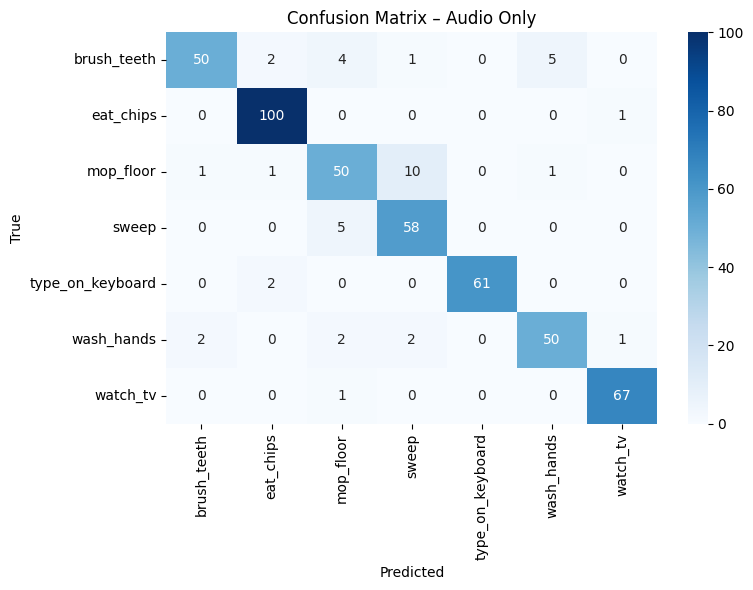

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = audio_pipeline.predict(X_test)

# Metrics
print("Audio-Only Model Performance:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=audio_pipeline.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=audio_pipeline.classes_,
            yticklabels=audio_pipeline.classes_,
            cmap="Blues")
plt.title("Confusion Matrix – Audio Only")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()